### 추세 지속 일수 분석

In [120]:
%matplotlib inline
import sys
sys.path.append('../../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

In [9]:
from tools import open_file, dataframe

In [241]:
raw_file = open_file('h5py',"custom/ohlc_trend(20).h5")

In [242]:
up = []
down = []
for idx, value in enumerate(raw_file.values()):
    data = value.value[:,-1]
    uptrend = np.where(data > 0.5)[0]
    downtrend = np.where(data < -0.5)[0]
    
    up += [len(x) for x in np.split(uptrend, np.where(np.diff(uptrend) != 1)[0]+1)]
    down += [len(x) for x in np.split(downtrend, np.where(np.diff(downtrend) != 1)[0]+1)]

In [243]:
upcnt = Counter(up)
downcnt = Counter(down)

In [263]:
upx, upval = zip(*sorted(upcnt.items()))
downx, downval = zip(*sorted(downcnt.items()))

upx = np.array(upx)
upval = np.array(upval)/sum(upval)
downx = np.array(downx)
downval = np.array(downval)/sum(downval)

In [246]:
cumup = [ sum(upval[x+1:]) / sum(upval[x:]) for x in range(len(upval)-1)]
cumdown = [ sum(downval[x+1:]) / sum(downval[x:]) for x in range(len(downval)-1)]

### 추세 지속일 분포

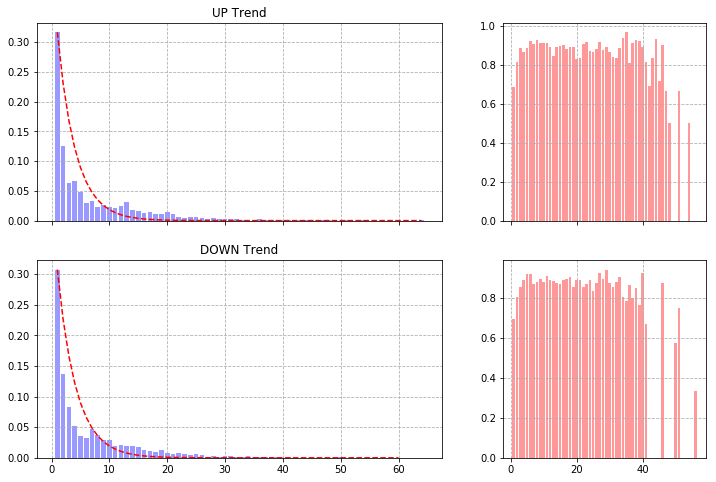

In [275]:
f, (ax) = plt.subplots(2,2, figsize=(12,8), sharex='col', gridspec_kw={'width_ratios':[2, 1]} )
ax[0][0].bar(upx, upval, color='#9999ff')
ax[0][1].bar(upx[:-1], cumup, color='#ff9999')
ax[1][0].bar(downx, downval, color='#9999ff')
ax[1][1].bar(downx[:-1], cumdown, color='#ff9999')

#exponential distribution
expup = upval[0] * np.exp(-upval[0] * (upx-1))
expdown = downval[0] * np.exp(-downval[0]*(downx-1))

ax[0][0].plot(upx, expup, linestyle='--', color='red')
ax[1][0].plot(downx, expdown, linestyle='--', color='red')

for axe in f.get_axes():
    axe.grid(linestyle='--')
ax[0][0].set_title("UP Trend")
ax[1][0].set_title("DOWN Trend")